# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Write your code here to read the data
df = pd.read_csv("foodhub_order.csv")


In [5]:
# Write your code here to view the first 5 rows
df.head(5)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations:

The food_hub dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We see that order_id, customer_id, food_preparation_time, delivery_time are integere type of attributes, cost_of_the_order is float. The rest (restaurant_name, cuisine_type, days_of_the_week, and rating) are object data type that means the attributes can have either string, numeric values. Moreover, dataset shows that the attributes with the object type have discrete/categoraocal values, e.g., rating has 'Not given', '5', '4', '3'.  

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

The total non-null count of each column/attribute match to the total count of the row. This means, the dataset has no null value. This is also supported by the above result.
So, there are no missing values in the data. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The above shows the description of all attributes. Numerical attributes have descriptive statistics like, mean, max, std, etc, where as categorical attributes have count.

As we see from the above output, it takes minimum 20 minutes, maximum 35 minutes, and average 27.37 minutes for food to be prepared once an order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
# First, we filter all the 'Not given' rating order from the dataframe, take the rating column and then get its count. 
total_order_without_rating = df[df['rating'] == 'Not given']['rating'].count()
print("Total order without rating {}".format(total_order_without_rating))



Total order without rating 736


#### Observations:
Total order without rating 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### customer_id

In [71]:
# Customer analysis
# Top N (=20) customer and their order
N=20
print("Total order by top {} customer".format(N))
df_top_N = df["customer_id"].value_counts()[:N]
print("\n\033[4mcustomer_id\033[0m \033[4mTotal Order\033[0m")
print(df_top_N)

Total order by top 20 customer

customer_id Total Order
52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
Name: customer_id, dtype: int64


In [12]:
# Write the code here
# Total unique custorm
total_unique_customer = df["customer_id"].nunique()
print("Total unique customer = {}".format(total_unique_customer))
# %of total order by top 20 customer
total_order = df["order_id"].count()
print("Total order = {}".format(total_order))
total_order_by_top_N = df_top_N.reset_index().rename(columns={"customer_id": "total_order"})["total_order"].sum()

print("Total of order place by top {} customer = {}".format(N, total_order_by_top_N))
print("Percentage of order place by top {} customer = {:.2%}".format(N, total_order_by_top_N/total_order))

# Customer with 1 order only
df_cust= df.groupby("customer_id")["order_id"].count().reset_index().rename(columns={"order_id": "total_order"})
total_customer_with_one_order = df_cust[df_cust["total_order"] == 1]["customer_id"].count()

print("Percentage of customer who place only one order = {:.2%}".format(total_customer_with_one_order/total_unique_customer))
print("Total customer placing only one order = {}".format(total_customer_with_one_order))
print("Percentage of orders place by customer who order one = {:.2%}".format(total_customer_with_one_order/total_order))


Total unique customer = 1200
Total order = 1898
Total of order place by top 20 customer = 134
Percentage of order place by top 20 customer = 7.06%
Percentage of customer who place only one order = 65.33%
Total customer placing only one order = 784
Percentage of orders place by customer who order one = 41.31%


##### Observation:
65.33% of customers who ordered food only once using the app. 

#### order_id

##### Observation:
* Total number of order 1898

#### restaurant_name

In [72]:
# Top N (=20) restaurant and their order
N=20
print("Total order placed to top {} restaurant".format(N))
df_top_N_restaurant = df["restaurant_name"].value_counts()[:N]
print("\n\033[4mRestaurant\033[0m                  \033[4mTotal Order\033[0m")
print(df_top_N_restaurant)

Total order placed to top 20 restaurant

Restaurant                  Total Order
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Rubirosa                          37
Sushi of Gari 46                  37
Momoya                            30
Five Guys Burgers and Fries       29
Blue Ribbon Sushi Izakaya         29
Bareburger                        27
Tamarind TriBeCa                  27
Jack's Wife Freda                 25
Sushi of Gari Tribeca             24
Name: restaurant_name, dtype: int64


In [14]:
# Restaurant analysis

#top N restaurant who has the most order
# Total unique restaurant
total_unique_restaurant = df["restaurant_name"].nunique()
print("Total unique restaurant = {}".format(total_unique_restaurant))
# %of total order by top 20 restaurant
total_order = df["order_id"].count()
print("Total order = {}".format(total_order))
total_order_by_top_N_restaurant = df_top_N_restaurant.reset_index().rename(columns={"restaurant_name": "total_order"})["total_order"].sum()

print("Total of order recieved by top {} restaurant = {}".format(N, total_order_by_top_N_restaurant))
print("Percentage of order recieved by top {} restaurant = {:.2%}".format(N, total_order_by_top_N_restaurant/total_order))



# restaurant with 1 order only
df_rest= df.groupby("restaurant_name")["order_id"].count().reset_index().rename(columns={"order_id": "total_order"})
total_restaurnat_with_one_order = df_rest[df_rest["total_order"] == 1]["restaurant_name"].count()

print("Percentage of restaurant who recieve only one order = {:.2%}".format(total_restaurnat_with_one_order/total_unique_restaurant))
print("Total restaurant having only one order = {}".format(total_restaurnat_with_one_order))
print("Percentage of orders recieved by restaurant with only one order = {:.2%}".format(total_restaurnat_with_one_order/total_order))


Total unique restaurant = 178
Total order = 1898
Total of order recieved by top 20 restaurant = 1194
Percentage of order recieved by top 20 restaurant = 62.91%
Percentage of restaurant who recieve only one order = 28.09%
Total restaurant having only one order = 50
Percentage of orders recieved by restaurant with only one order = 2.63%


##### Observation:
* Top 3 popular restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi
* Top 20 restaurants get the near 63% of orders
* There are 50 restaurants with only one order

In [64]:
# Functions for drawing graph for numerical and categorical attributes
def pie_chart(df, column_name):
    
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if not is_numeric:
        df_unique_value_count = df[column_name].value_counts()
        #counts = df['house_electricity'].value_counts(dropna=False)
        plt.figure(figsize=(6, 6))
        df_unique_value_count.plot.pie(autopct='%1.1f%%', labels=df_unique_value_count.index, shadow=True, textprops={'fontsize': 10})
        
        plt.title("Percentage distribution of {}".format(column_name))
        
        plt.axis('equal')
        plt.show()

def box_plot(df, y_column, x_column=None):
    #sns.boxplot(df, x_column, y_column)
    plt.figure(figsize=(6, 4))
    sns.set_style("whitegrid") 
    sns.boxplot(x = x_column, y = y_column, data = df,showmeans=True)
    plt.show()
    
def show_count_plot(df, column_name):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False
    if not is_numeric:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column_name)
        plt.title("Value Counts of {}".format(column_name))
        plt.xticks(rotation=45)
        plt.show()

# binned historgram graph will be helpful for varying custome width/bin in histogram
def show_historgram_and_binned_count_plot(df, column_name, bins=10):
    df_cpy = df.copy()
    
    if bins > 0:
        fig, ax =plt.subplots(1,2, figsize=(20,8))
        sns.histplot(data = df_cpy, x=column_name, kde=True, ax=ax[0])
        
        df_cpy["{} (binned)".format(column_name)] = pd.cut(df_cpy[column_name], bins=bins)
        sns.countplot(data=df_cpy, x="{} (binned)".format(column_name), ax=ax[1])
        ax[1].set_xticks(ax[1].get_xticks())
        ax[1].set_yticks(ax[1].get_yticks())
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')
        
    else:
        sns.histplot(data = df_cpy, x=column_name, kde=True)

    plt.show()
    
def unique_values(df, column_name):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if not is_numeric:
        df_unique_value_count = df[column_name].value_counts()
        print("Total unique value {} for attribute {}".format(len(df_unique_value_count.index), column_name))
        
        #printing underline text
        print("\n\033[4m{}\033[0m  \033[4mTotal Count\033[0m".format(column_name))
        print(df_unique_value_count)
        

def show_stat(df, column_name, bins=10, show_pie=True):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if is_numeric:
        print("{} is a numeric attribute. \nData type: {}".format(column_name, column_data_type_name))
        show_historgram_and_binned_count_plot(df, column_name, bins)
        box_plot(df, column_name)
    else:
        print("{} is a categorical attribute. \nData type: {}".format(column_name, column_data_type_name))
        unique_values(df, column_name)
        show_count_plot(df, column_name)
        if show_pie == True:
            pie_chart(df, column_name)
      


#### cuisine_type

cuisine_type is a categorical attribute. 
Data type: object
Total unique value 14 for attribute cuisine_type

cuisine_type  Total Count
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


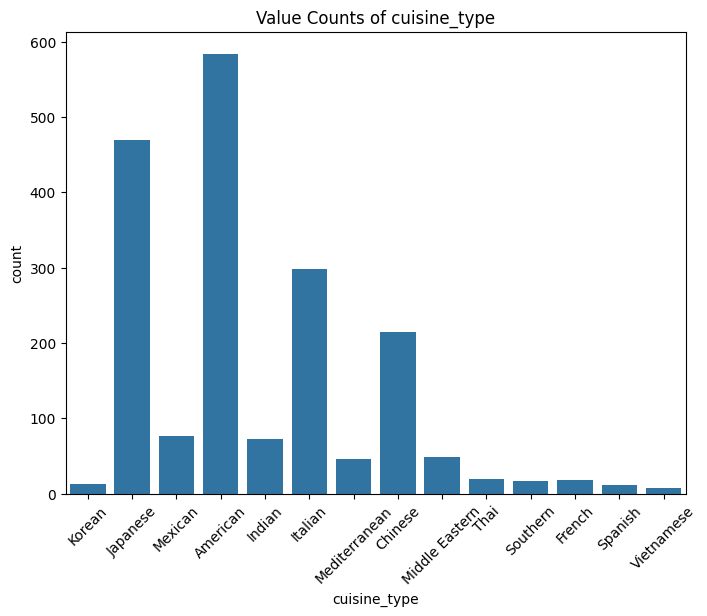

In [16]:
show_stat(df, "cuisine_type", bins=0, show_pie=False)


In [17]:
# Top N (=4) cuisine_type and their orders
N=4
df_top_N = df["cuisine_type"].value_counts()[:N]

total_order = df["order_id"].count()
total_order_by_top_N_cuisine = df_top_N.reset_index().rename(columns={"cuisine_type": "total_order"})["total_order"].sum()
print("Total orders recieved belonging to top {} cuisine = {}".format(N, total_order_by_top_N_cuisine))
print("Percentage of order recieved belonging to top {} cuisine = {:.2%}".format(N, total_order_by_top_N_cuisine/total_order))


Total orders recieved belonging to top 4 cuisine = 1567
Percentage of order recieved belonging to top 4 cuisine = 82.56%


##### Observation:
* American, Japanese, Italian, and Chinese are the top popular cuisine
* 82.56% of orders are from the above top 4 cuisines.

#### cost_of_the_order

cost_of_the_order is a numeric attribute. 
Data type: float64


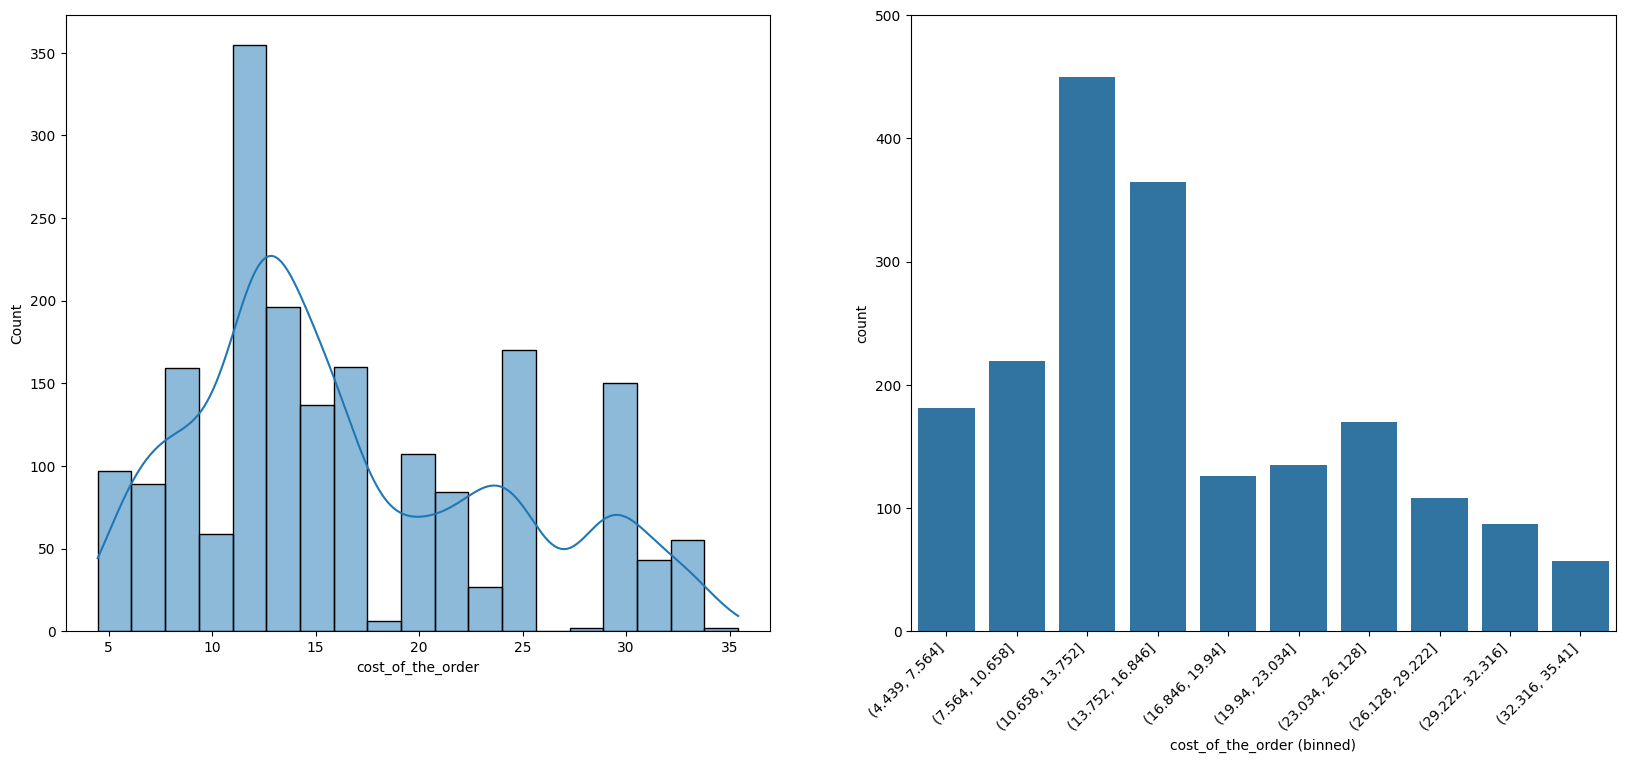

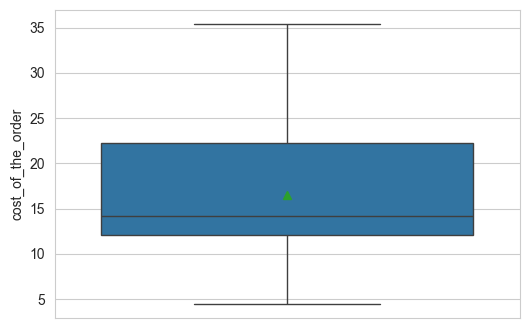

In [18]:
show_stat(df, "cost_of_the_order", bins=10, show_pie=False)

##### Observation:
* cost_of_the_order has a right skewed distribution with no outlier
* Most orders cost from \\$12 - \\$23 and average nearly \\$16
* Binned historgram (bin = 10) shows that almost 450 order costs in netween \\$10.65 - \\$13.75 and almost 370 orders fall in between \\$13.75 - \\$16.84 

#### day_of_the_week

day_of_the_week is a categorical attribute. 
Data type: object
Total unique value 2 for attribute day_of_the_week

day_of_the_week  Total Count
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


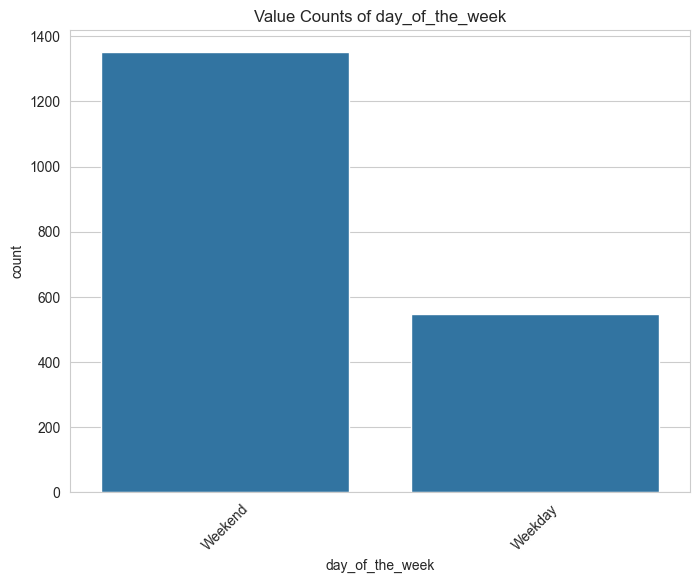

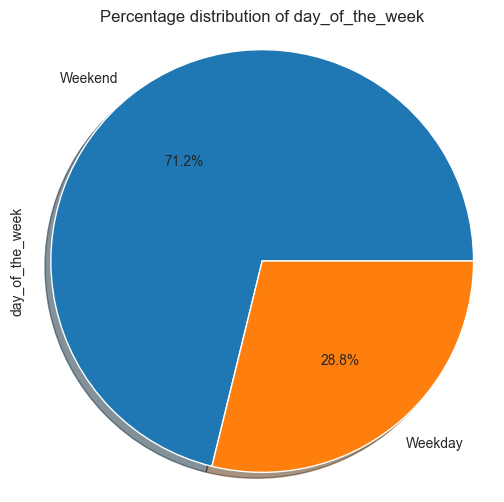

In [19]:
show_stat(df, "day_of_the_week", bins=0, show_pie=True)

##### Observation:
* People order more in weekend (71.2%) than weekday (28.8%)

#### rating

rating is a categorical attribute. 
Data type: object
Total unique value 4 for attribute rating

rating  Total Count
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


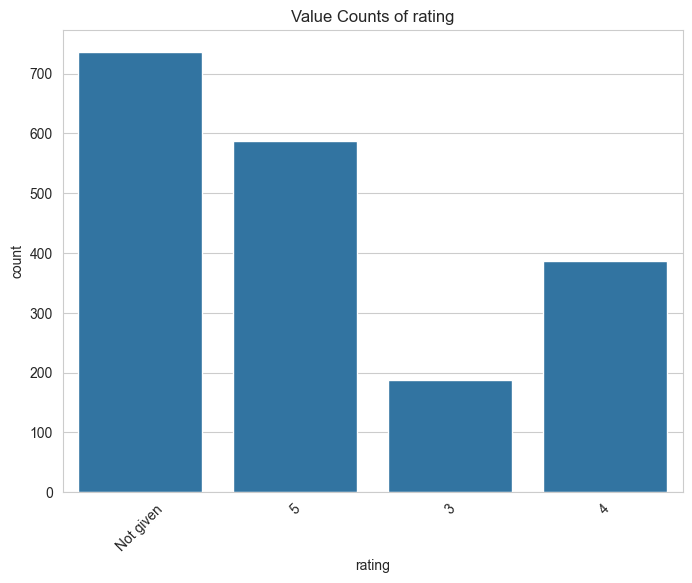

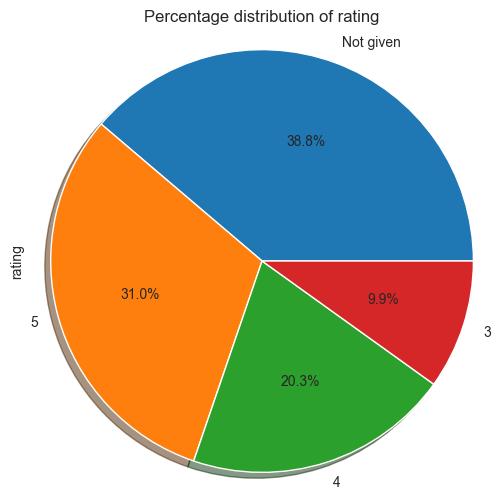

In [20]:
show_stat(df, "rating", bins=0, show_pie=True)

##### Observation:
* 736 orders (38.8% of orders) have missing/Unknown rating
 

#### food_preparation_time

food_preparation_time is a numeric attribute. 
Data type: int64


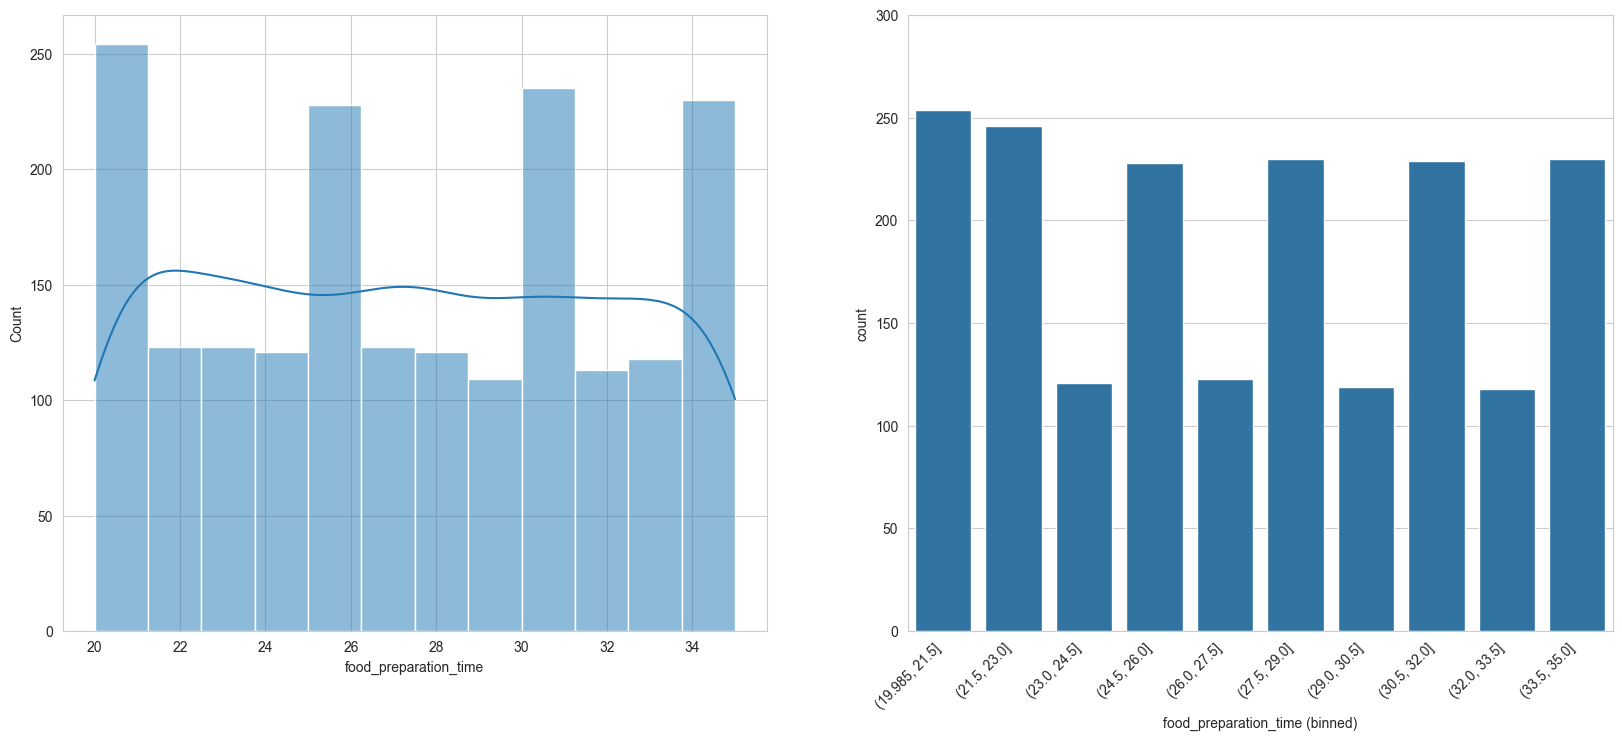

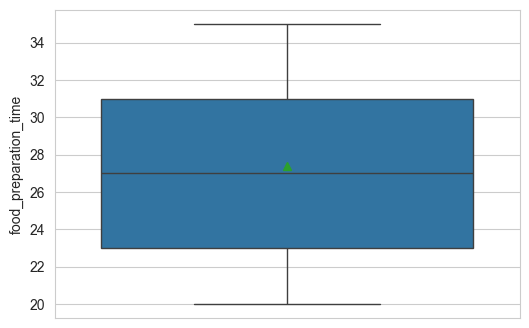

In [21]:
show_stat(df, "food_preparation_time", bins=10, show_pie=False)

##### Observation:
* food_preparation_time has almost normal distribution (mean equals to median close to 27 minutes) with no outlier
* Most order take in between 23 - 31 minutes to prepare
  

#### delivery_time

delivery_time is a numeric attribute. 
Data type: int64


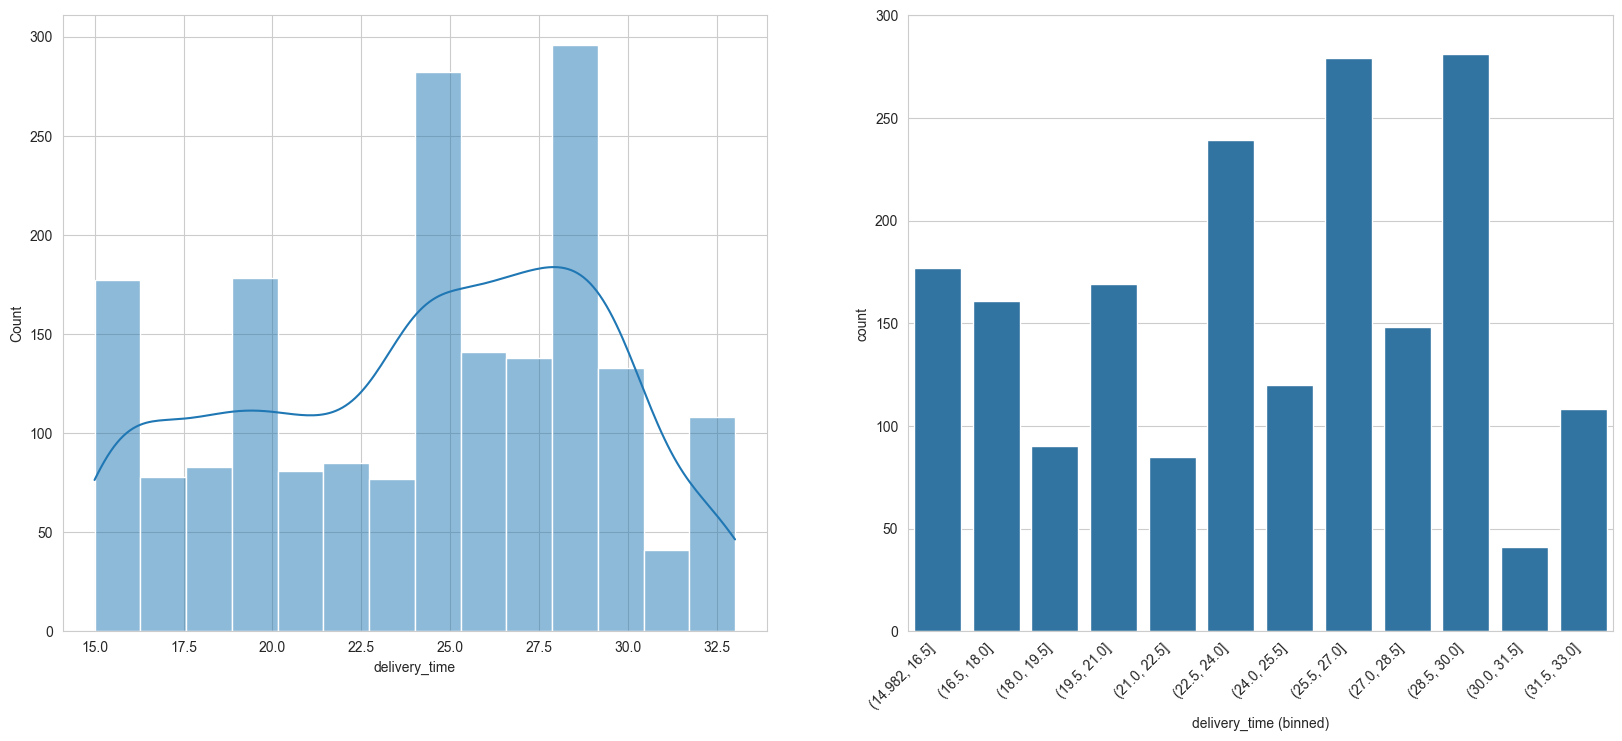

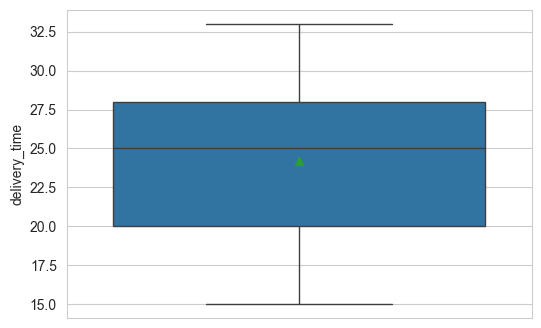

In [22]:
show_stat(df, "delivery_time", bins=12, show_pie=False)

##### Observation:
* delivery_time has a left skewed distribution with no outlier
* Most orders are delivered within 20 - 28 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Write the code here
N=5
df_top_N_restaurant = df["restaurant_name"].value_counts()[:N]
print(df_top_N_restaurant)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
Shake Shack,The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm are the top 5 restaurants by number of orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
# Write the code here
# Top 5 popular cuisine in weekend
print(df[df["day_of_the_week"] == 'Weekend']["cuisine_type"].value_counts(ascending=False)[:1])


American    415
Name: cuisine_type, dtype: int64


#### Observations:
American cuisine is the most popular cuisine on weekend

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Write the code here
# % of orders cost more than 20 dollar
total_order = df['order_id'].nunique()
#print(total_order)
percentage_of_order_over_20_dollar = df[df['cost_of_the_order'] > 20]['order_id'].nunique()/total_order * 100
print("Percentage of order over $20 = {:.2f}%".format(percentage_of_order_over_20_dollar))

Percentage of order over $20 = 29.24%


#### Observations:
29.24% of order costing more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Write the code here
# Mean order delivery time
print(df['delivery_time'].mean())

24.161749209694417


#### Observations:
mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Write the code here
#Top N customer
N=3
print ("customer_id  total order")
print(df["customer_id"].value_counts()[:N])


customer_id  total order
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
Top 3 most frequent customer ids are: 

52832 with  13 orders,
47440 with  10 orders,
83287  with 09 orders 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### days_of_the_week vs cost_of_the_order

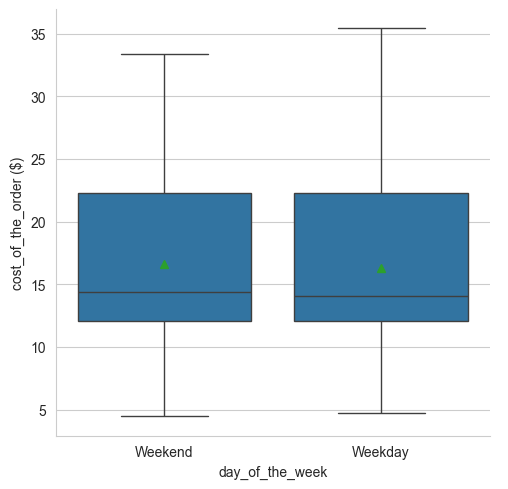

In [28]:
# Write the code here
sns.catplot(data=df, x="day_of_the_week", y="cost_of_the_order",  kind="box", showmeans=True)
plt.ylabel('cost_of_the_order ($)')
plt.show()

##### Observations:
* Average cost (roughly \\$16) of food is identical during both weekdays and weekends

#### days_of_the_week vs cost_of_the_order vs cuisine_type

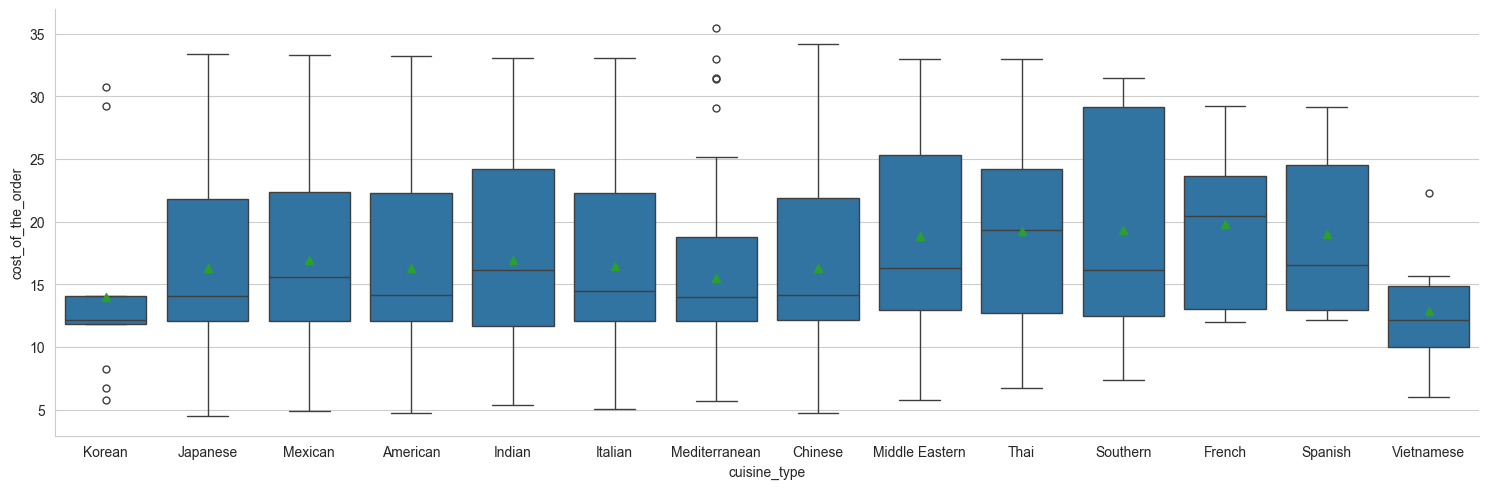

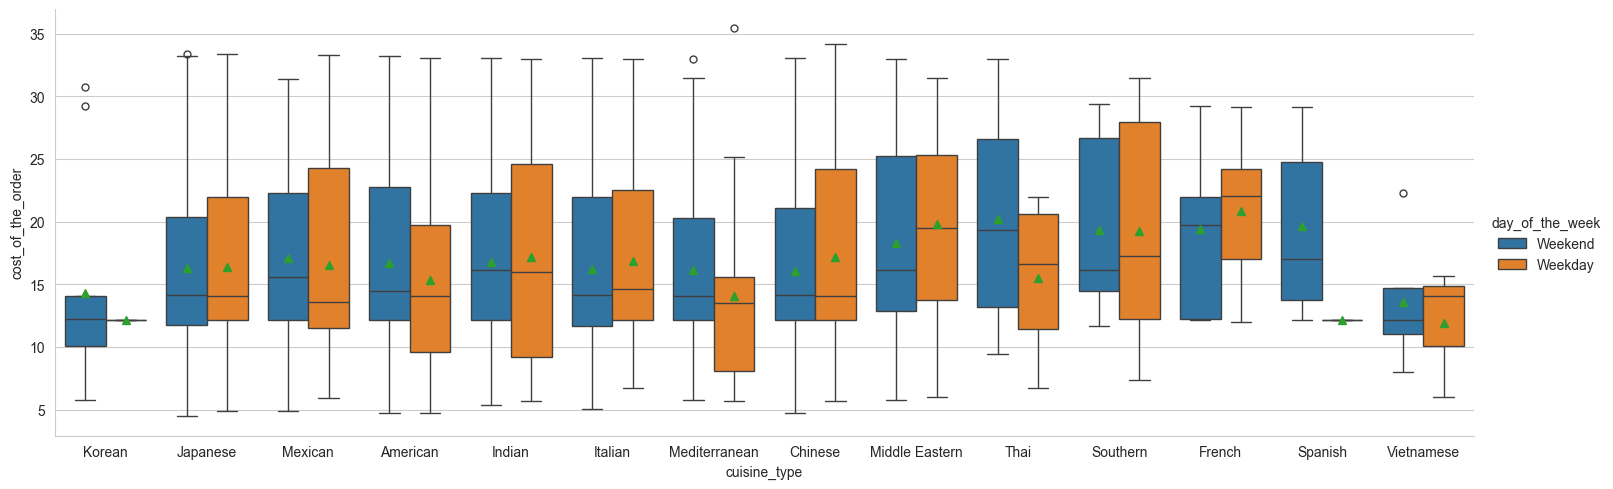

In [29]:
    column_with_top_n_values = lambda column, n : df[column].value_counts().index.to_list()[:n]
    popular_cusine = df[df["cuisine_type"].isin(column_with_top_n_values("cuisine_type", 5))]
    sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order",  kind="box", height=5, aspect=3, showmeans=True)
    sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week", kind="box", height=5, aspect=3, showmeans=True)
    plt.show()

##### Observations:
* Korean and Vietnamese food have cost less and French, Southern, Thai, Middle Eastern food have cost more on an average
* Most cuisine foods have cost more in weekend except Indian, Italian, Chinese, Middle Eastern, and French
* Korean, Japanes, Mediterranean, and Vietnamese cuisines occationally cost more than as expected (outlier) 

#### day_of_the_week vs food_preparation_time

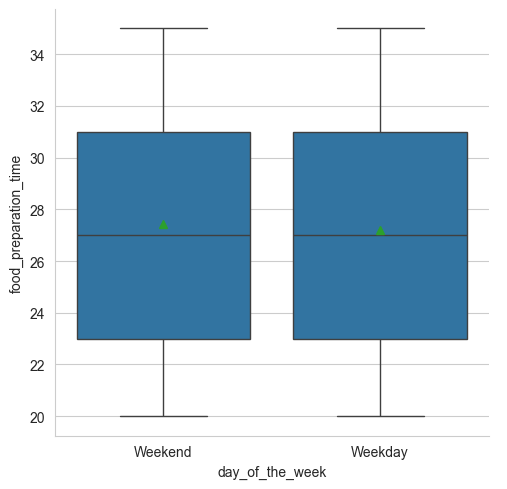

In [30]:
sns.catplot(data=df, x="day_of_the_week", y="food_preparation_time",  kind="box", showmeans=True)
plt.show()

##### Observations: 
* food preparation time is near identical in weekend and weekday

#### day_of_the_week vs food_preparation_time vs cuisine_type

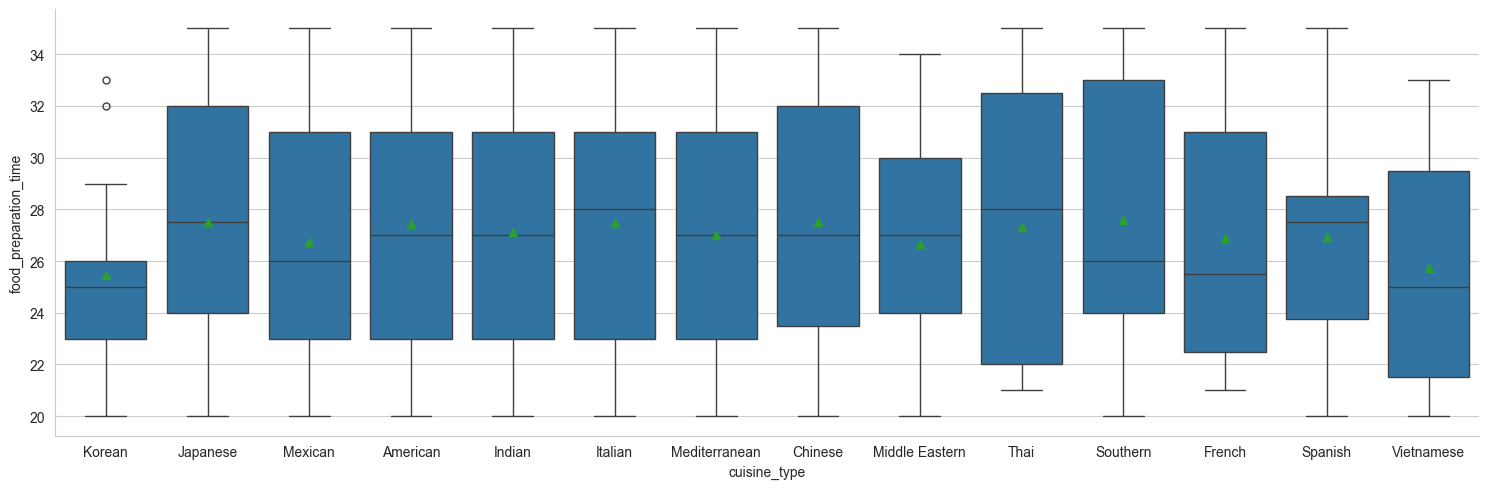

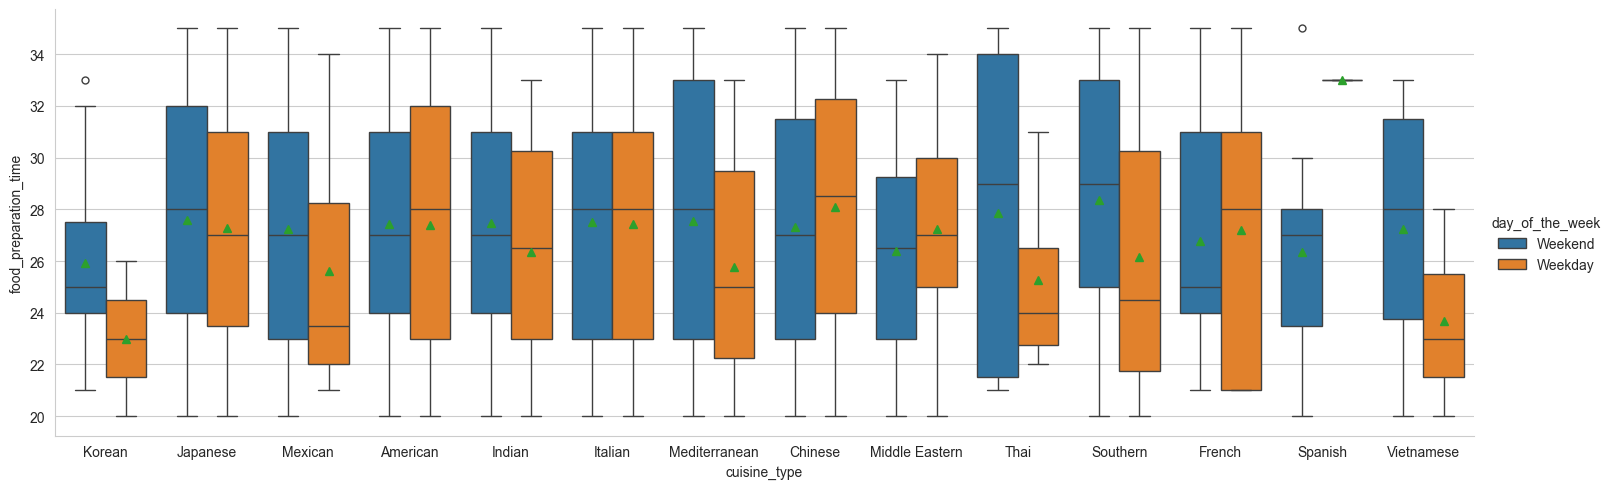

In [31]:
    sns.catplot(data=df, x="cuisine_type", y="food_preparation_time",  kind="box", height=5, aspect=3,showmeans=True)
    sns.catplot(data=df, x="cuisine_type", y="food_preparation_time", hue="day_of_the_week", kind="box", height=5, aspect=3, showmeans=True)
    plt.show()

##### Observations: 
* food preparation time is more during weekend on average than weekdays except Chinese, Middle Eastern, and French
* Occationally few cuisine (e.g., Korean and Spanish) took longer time than expected that could be outlier 

#### day_of_the_week vs delivery_time

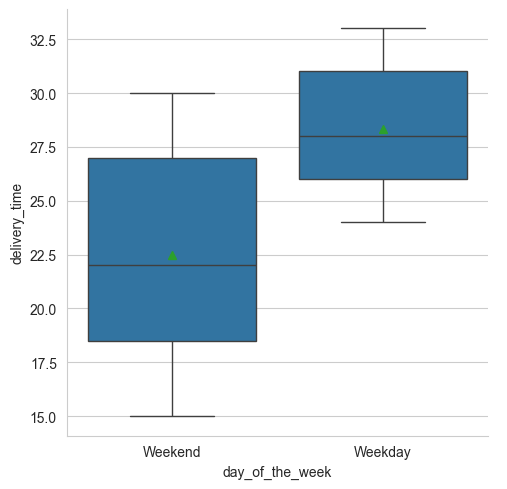

In [32]:
sns.catplot(data=df, x="day_of_the_week", y="delivery_time",  kind="box", showmeans=True)
plt.show()

##### Observations:
* Orders took longer delivery time during Weekday than Weekend

#### cuisine_type vs delivery_time vs day_of_the_week

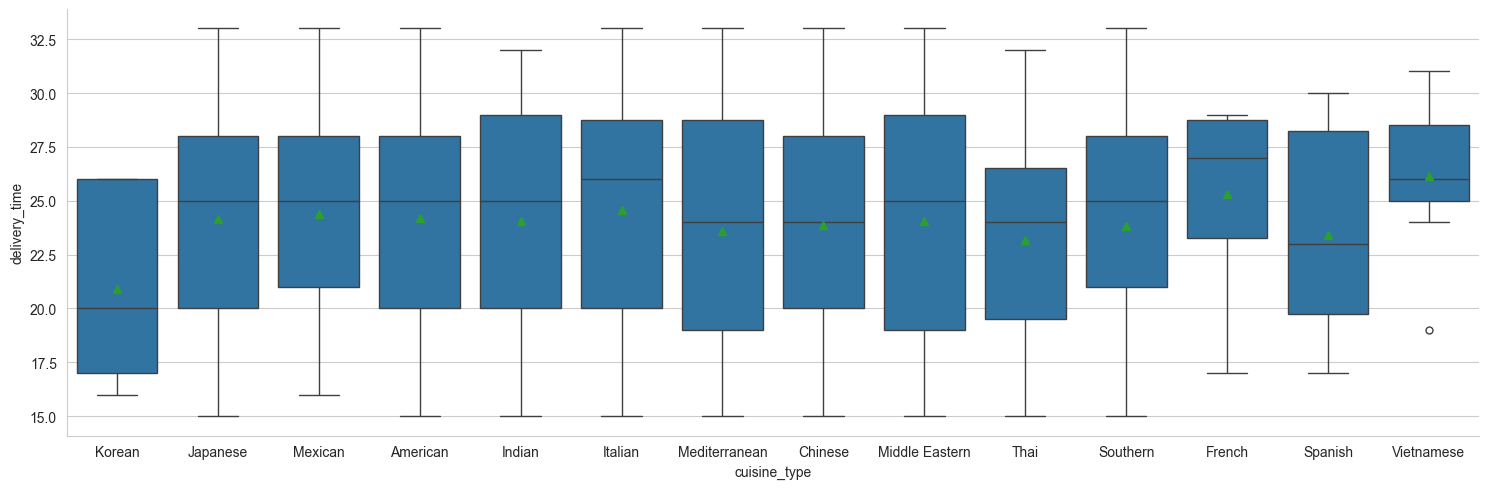

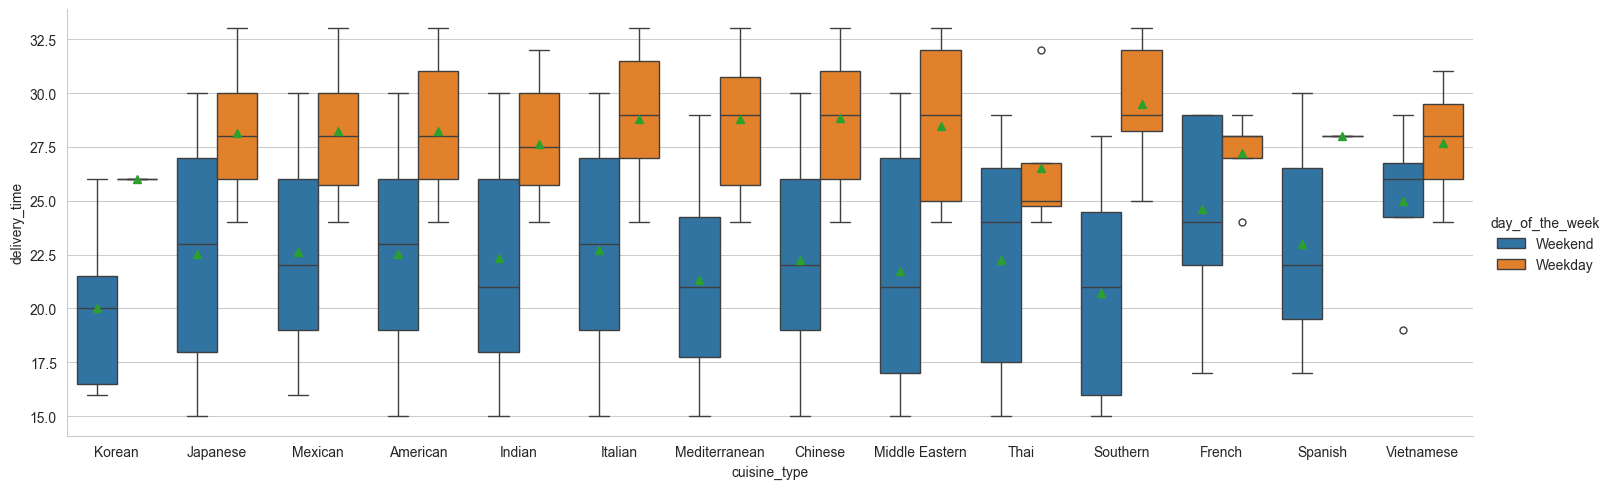

In [33]:
sns.catplot(data=df, x="cuisine_type", y="delivery_time",  kind="box", height=5, aspect=3, showmeans=True)
sns.catplot(data=df, x="cuisine_type", y="delivery_time", hue="day_of_the_week", kind="box", height=5, aspect=3, showmeans=True)

plt.show()

##### Observations:
* Orders with almost all cuisines took longer delivery time during Weekday than Weekend

#### rating vs delivery_time vs day_of_the_week

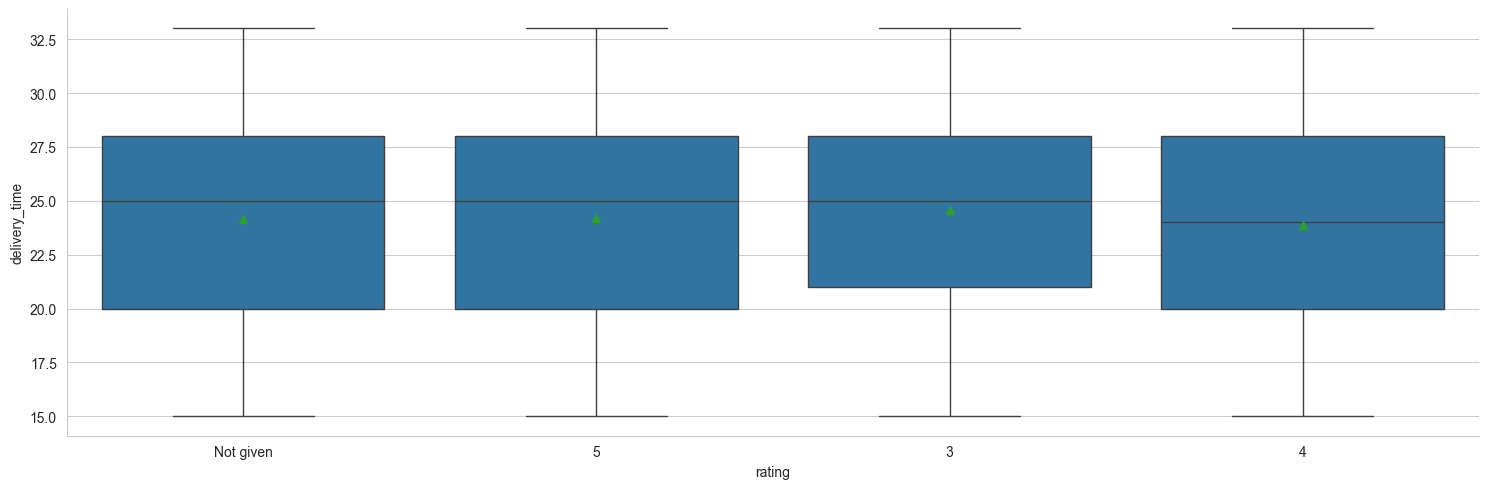

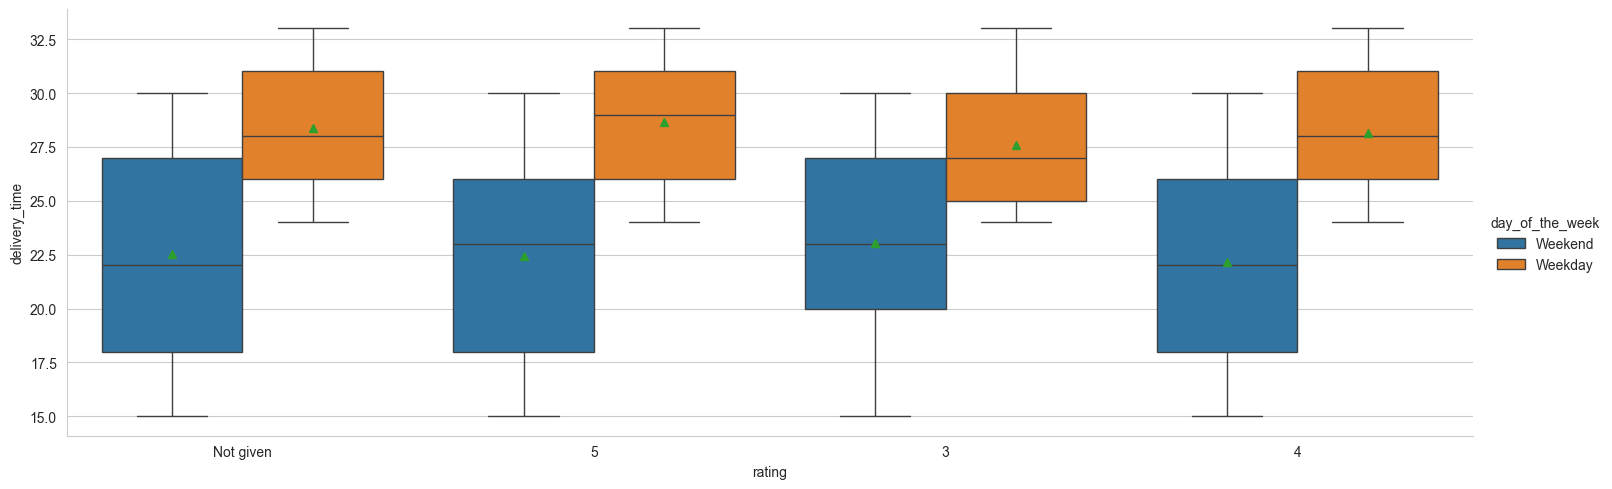

In [34]:
sns.catplot(data=df, x="rating", y="delivery_time",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()
sns.catplot(data=df, x="rating", y="delivery_time", hue="day_of_the_week",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()

##### Observations:
* rating doesn't impact delivery_time.
* delivery_time is highly related in day_of_the_week. Weekday delivery_time normally longer than Weekend

#### rating vs cost_of_the_order vs day_of_the_week

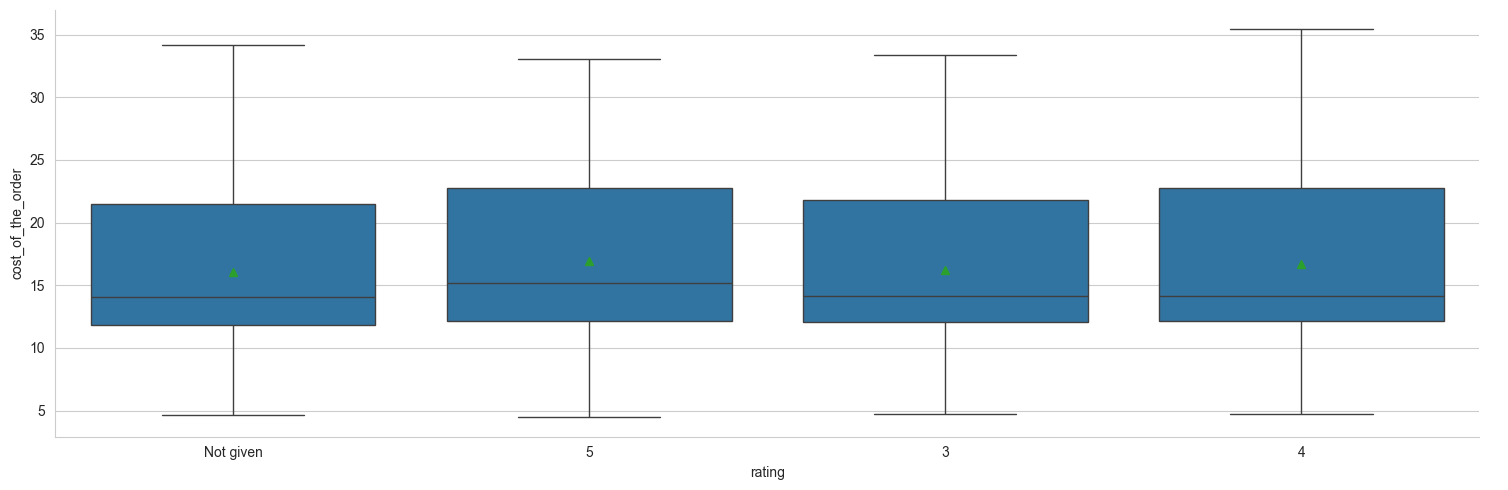

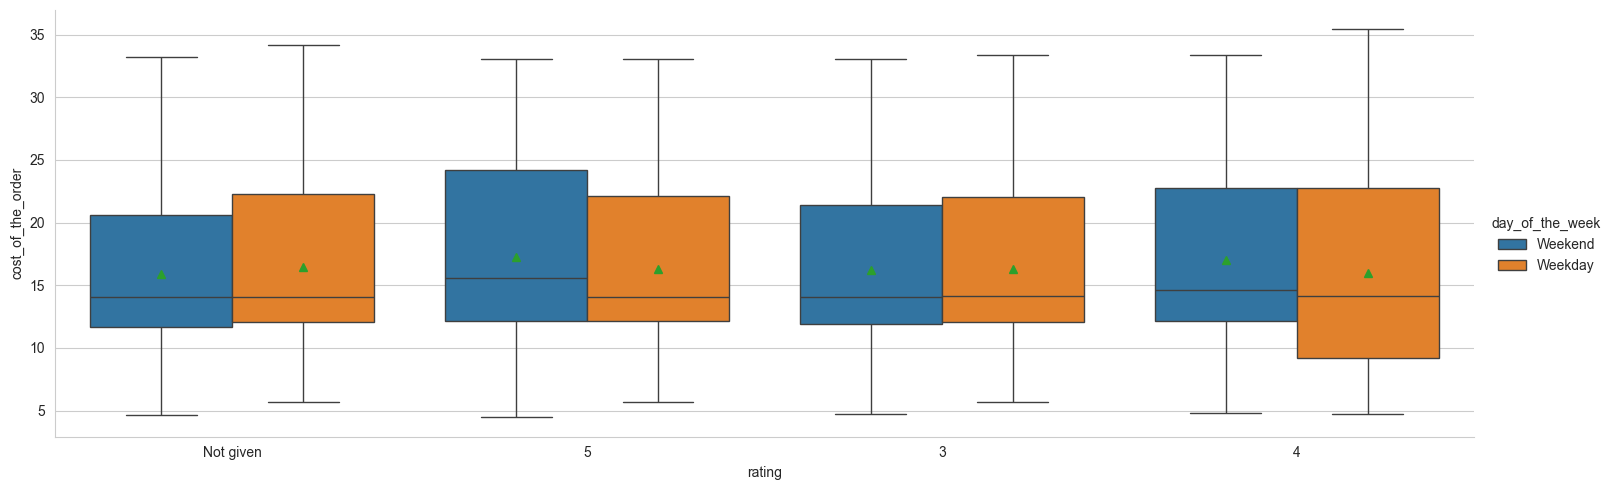

In [35]:
sns.catplot(data=df, x="rating", y="cost_of_the_order",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()
sns.catplot(data=df, x="rating", y="cost_of_the_order", hue="day_of_the_week",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()

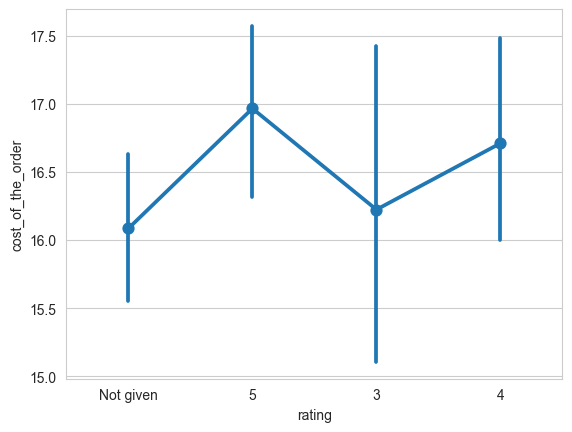

In [36]:
sns.pointplot(data=df, x="rating", y="cost_of_the_order")
plt.show()

##### Observations:
* Average cost_of_the_order of highly rated orders (rated 5) edge slightly than lower/not given rated orders.
* Top rated food cost a bit more during Weekend

#### cuisine_type vs day_of_the_week

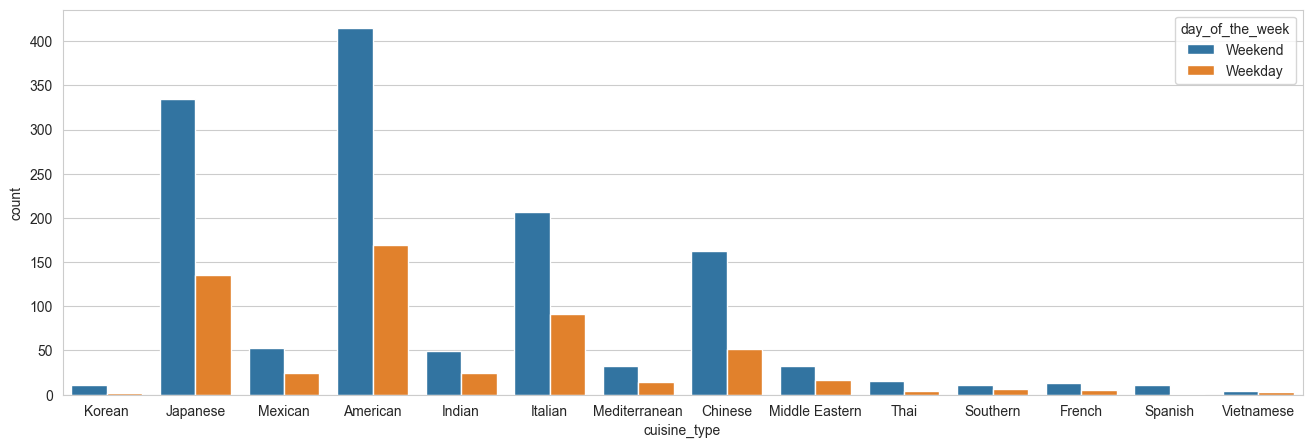

In [63]:
#cuisine_type vs day_of_the_week
plt.figure(figsize=(16, 5))
sns.countplot(data=df, x="cuisine_type", hue="day_of_the_week")
plt.show()

##### Observations: 
* American, Japanese, Italian, Chinese are the top most ordered of popular cuisines both in Weekend and Weekday
* People ordered more at Weekend than Weekday 

#### cuisine_type vs cost_of_the_order

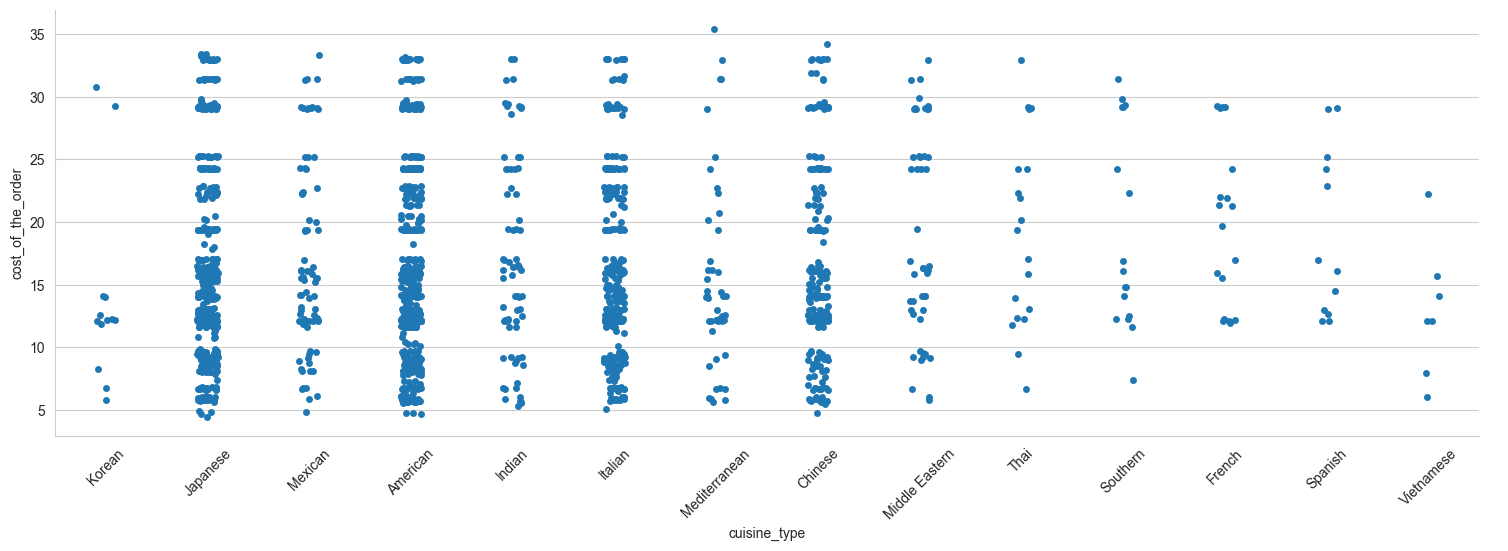

In [37]:
# Scater plot 
sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

    index    cuisine_type  avg_order_cost
0       2          French       19.793889
1      10        Southern       19.300588
2      12            Thai       19.207895
3      11         Spanish       18.994167
4       9  Middle Eastern       18.820612
5       8         Mexican       16.933117
6       3          Indian       16.919726
7       4         Italian       16.418691
8       0        American       16.319829
9       1         Chinese       16.305209
10      5        Japanese       16.304532
11      7   Mediterranean       15.474783
12      6          Korean       14.001538
13     13      Vietnamese       12.882857


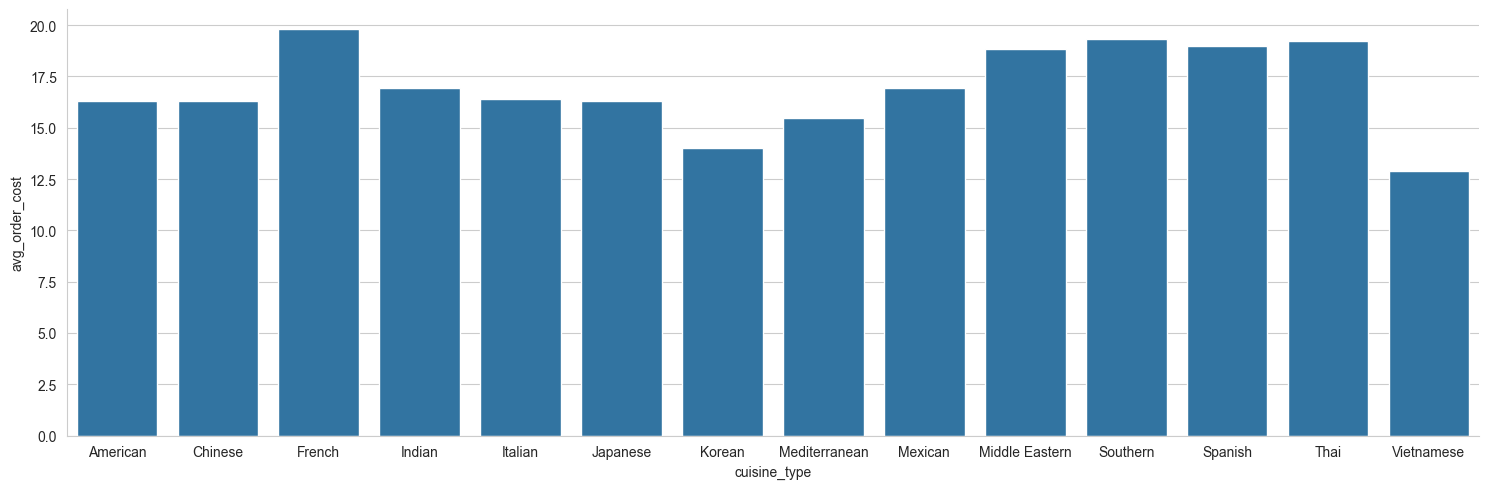

In [38]:
# Avg cost per cuisine 
df_avg_cuisine = df.groupby("cuisine_type")["cost_of_the_order"].mean().reset_index().rename(columns={'cost_of_the_order':'avg_order_cost'})
print(df_avg_cuisine.sort_values(by="avg_order_cost", ascending=False).reset_index())
sns.catplot(data=df_avg_cuisine, x="cuisine_type", y="avg_order_cost",  kind="bar", height=5, aspect=3)
plt.show()

Average cost of cuisine = 16.498851422550054


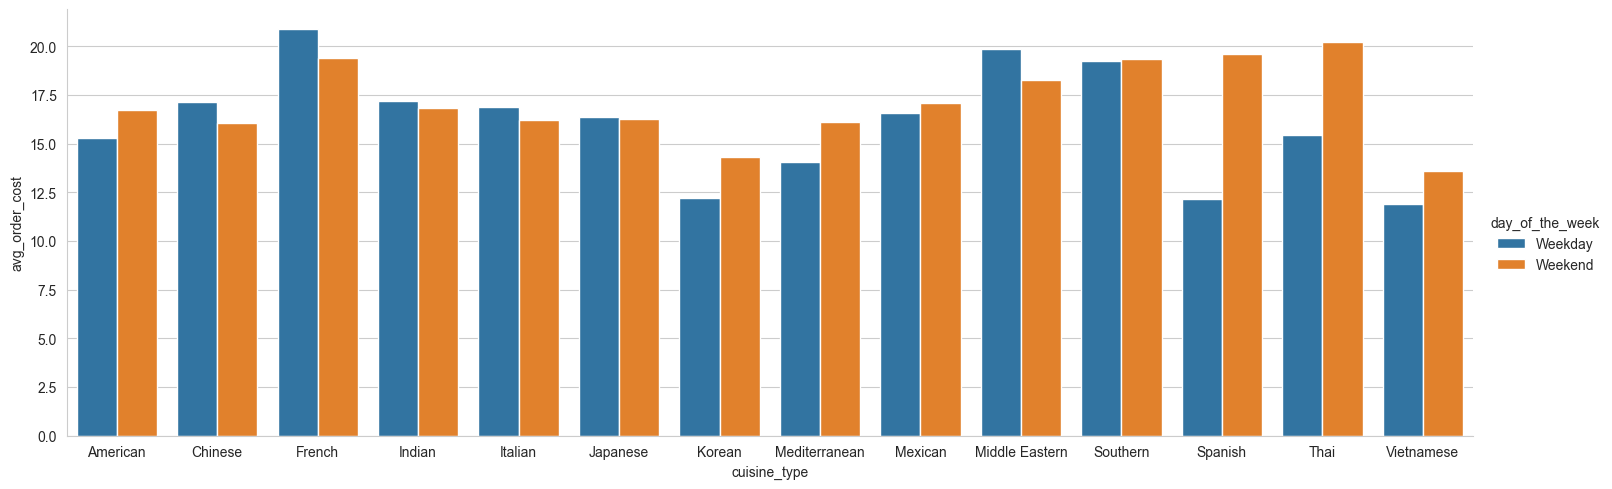

In [39]:
print("Average cost of cuisine = {}".format(df['cost_of_the_order'].mean()))
df_avg_cuisine_by_day = df.groupby(["cuisine_type", "day_of_the_week"])["cost_of_the_order"].mean().reset_index().rename(columns={'cost_of_the_order':'avg_order_cost'})
df_avg_cuisine_by_day.head()
sns.catplot(data=df_avg_cuisine_by_day, x="cuisine_type", y="avg_order_cost", hue="day_of_the_week", kind="bar", height=5, aspect=3)
plt.show()


##### Observations:
* Most cuisines have average order cost ranging between \\$16 - \\$19
* Some cuisines (Vietnamese, Korean, and Mediterranean) have lower average order cost between \\$12 - \\$15

#### Handling missing/Not given rating.

In [40]:
import numpy as np
#Rating impute missing value
# Step 1: We will assign mean (int) of rating of resturant if any rating of the restaurant missing
# We will fill null rating with the floor of mean rating by each restarurant
df["rating_impute"] = df["rating"].apply(lambda x: None if x == "Not given" else float(x)) 
df["rating_impute"] = df.groupby('restaurant_name')['rating_impute'].transform(lambda x: x.fillna(np.floor(x.mean())))
min_rating = df["rating_impute"].describe()['min']

In [41]:
# Step 2: Imputing missing rating with the minimum rating of dataset if any order still has missing after step 1.
# This is possible if order belonging to a restaurant don't have any rating.
still_null = df["rating_impute"].isnull().sum()
if (still_null > 0):
    print("There are {} orders with unrated/null".format(still_null))
    df["rating_impute"] = df["rating_impute"].fillna(value=df["rating_impute"].min())

still_null_after_impute_with_min = df["rating_impute"].isnull().sum()
print("Number of missing/unrated/null rating = {}".format(still_null_after_impute_with_min))
df["rating_impute"].describe().T

There are 30 orders with unrated/null
Number of missing/unrated/null rating = 0


count    1898.000000
mean        4.207587
std         0.644596
min         3.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating_impute, dtype: float64

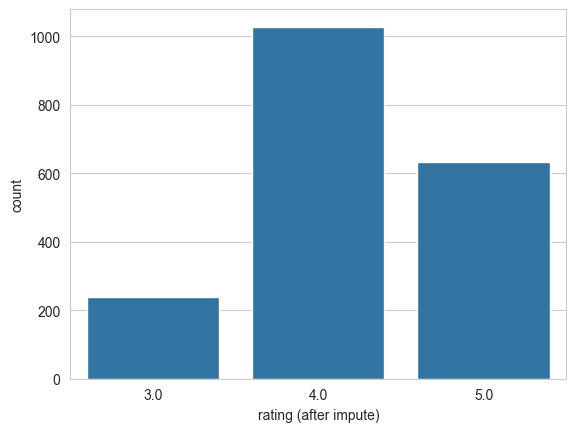

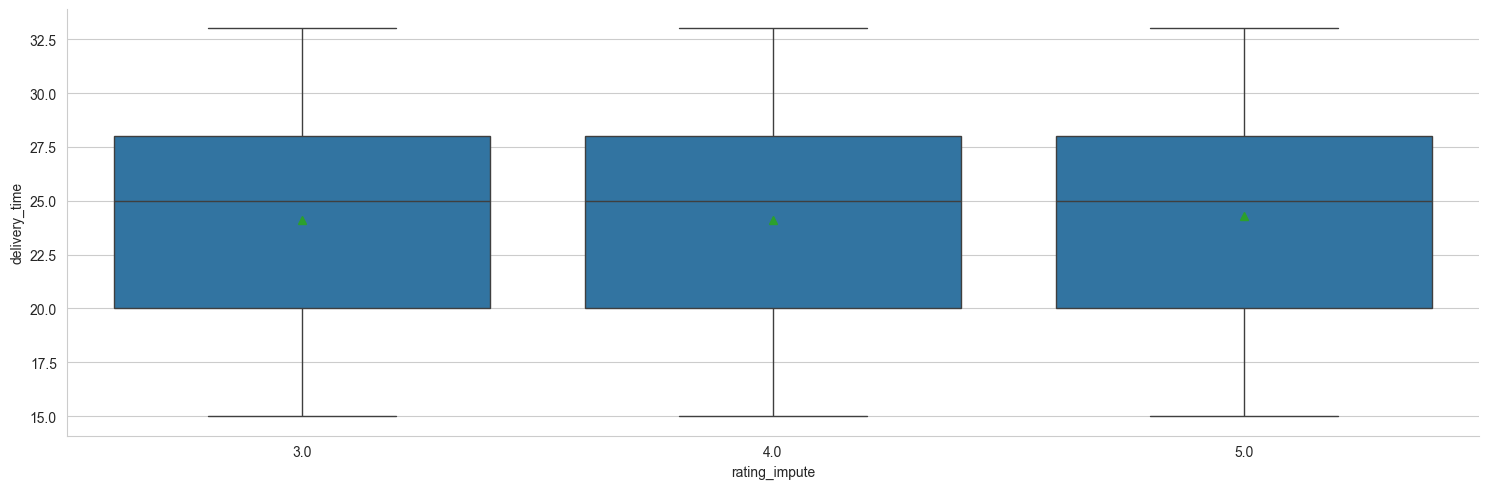

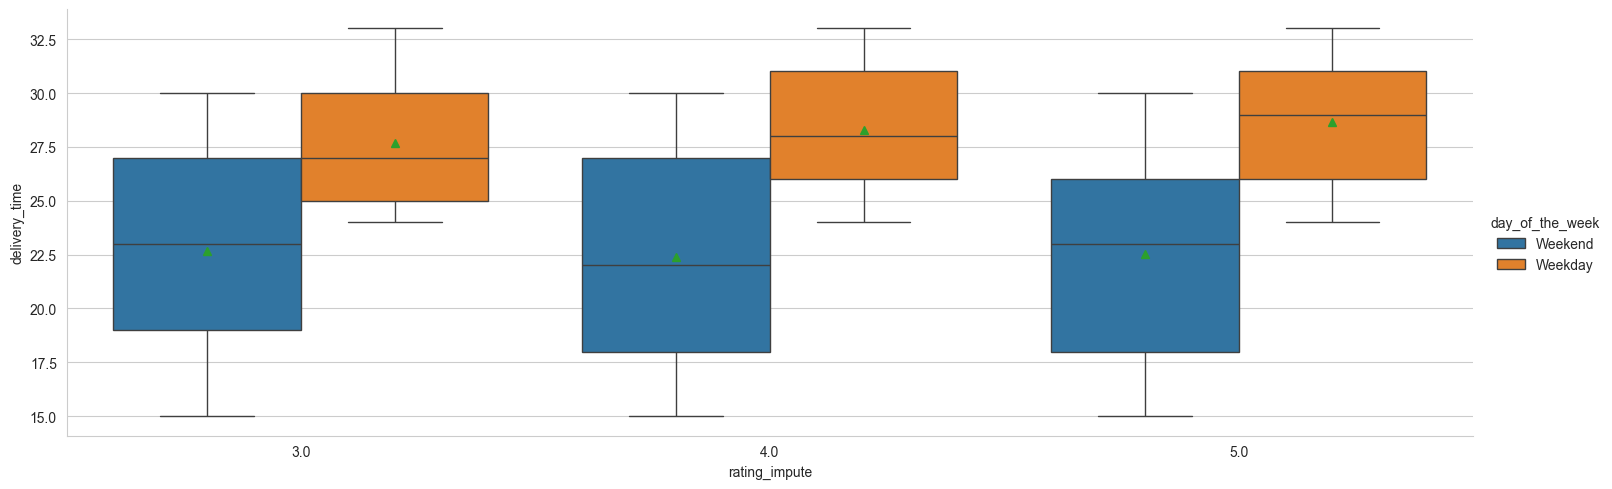

In [42]:
#rating (after imputing missing rating)
sns.countplot(data=df, x="rating_impute")
plt.xlabel('rating (after impute)')
plt.show()

sns.catplot(data=df, x="rating_impute", y="delivery_time",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()
sns.catplot(data=df, x="rating_impute", y="delivery_time", hue="day_of_the_week",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()

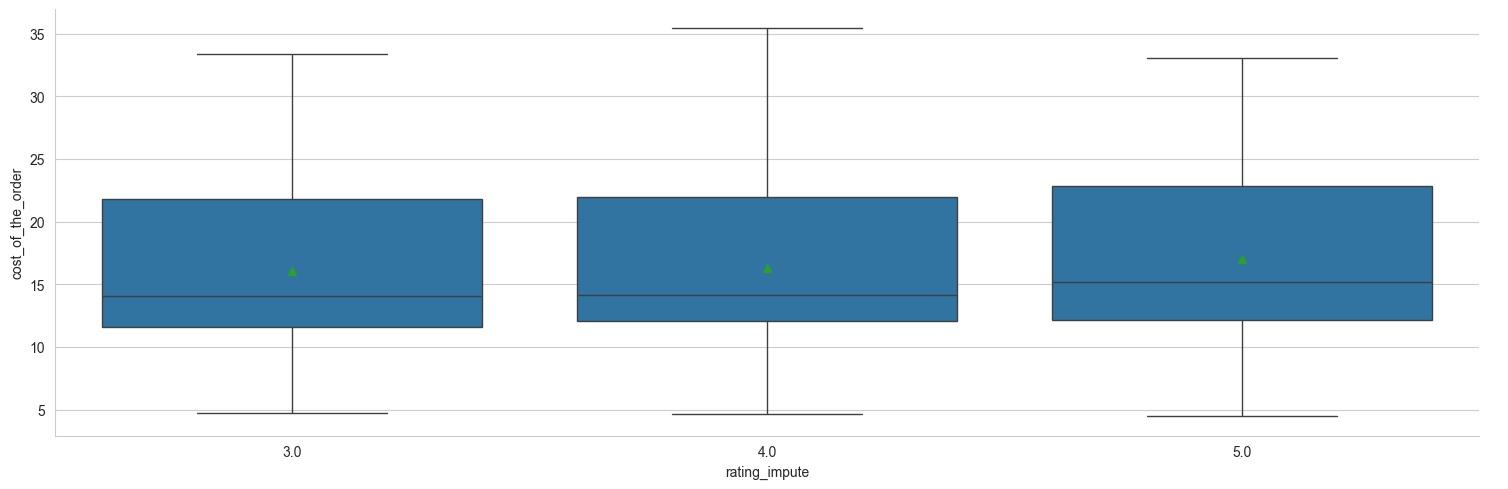

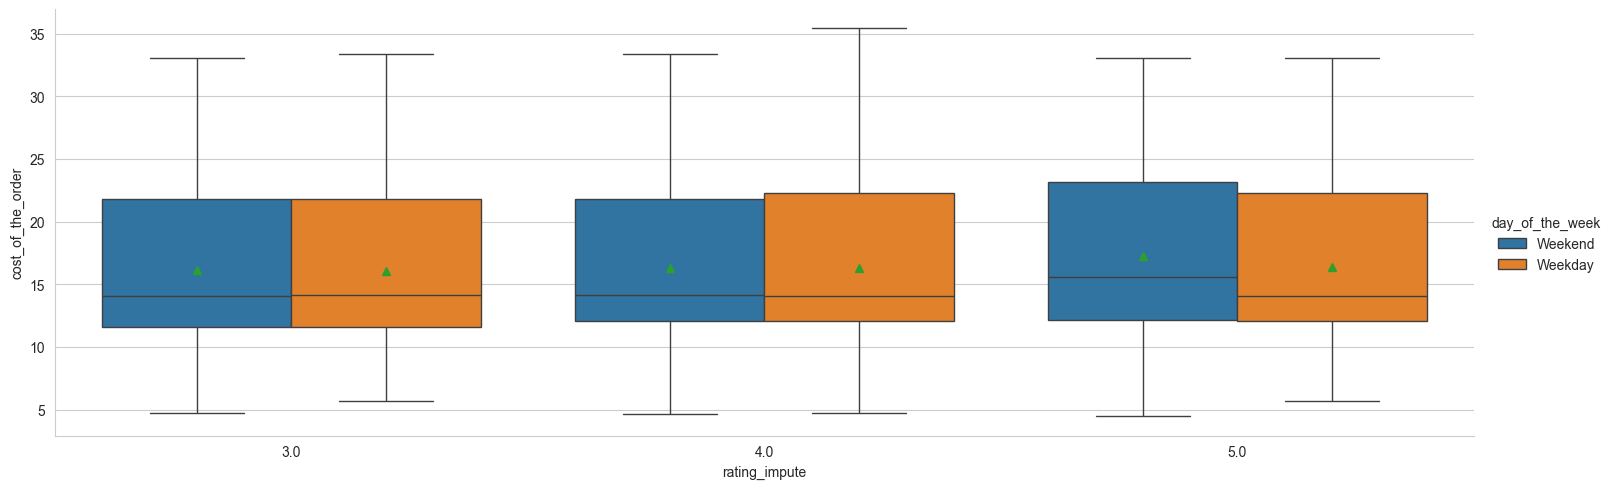

In [43]:
#rating (after imputing missing rating) vs cost_of_the_order
sns.catplot(data=df, x="rating_impute", y="cost_of_the_order",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()
sns.catplot(data=df, x="rating_impute", y="cost_of_the_order", hue="day_of_the_week",  kind="box", height=5, aspect=3, showmeans=True)
plt.show()

##### Observations
* We have more than 1000 orders with rating 4, more than 600 orders with rating 5, more than 200 orders with rating 3 after impute
* Averge delivery time doesn't change after impute and Weekday have longer delivery time than Weekday
* cost_of_the_order remain unchanged. However, highest rated order cost a little bit more in Weekend

##### Pairplot

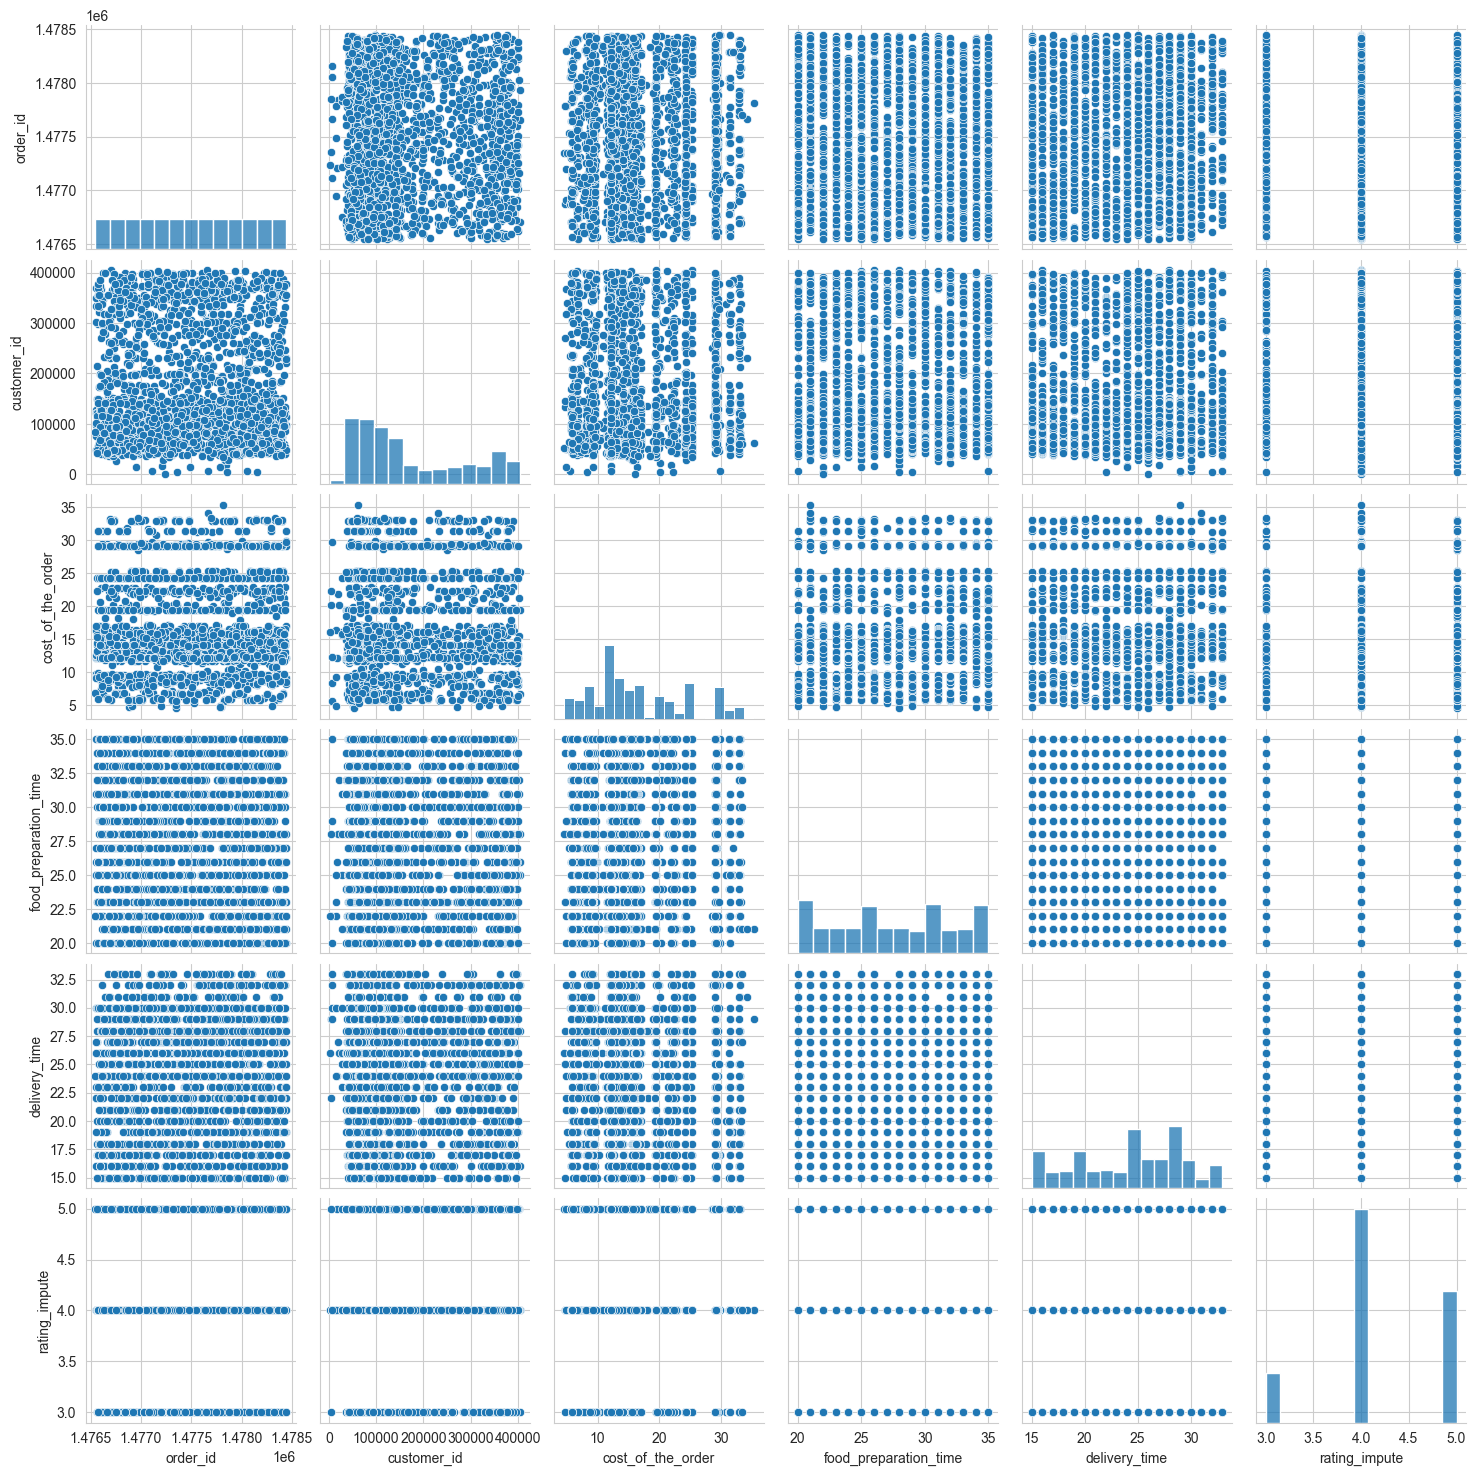

In [44]:
sns.pairplot(df)
plt.show()

##### Observations:
* No significance relation found

#### Correlation Matrix

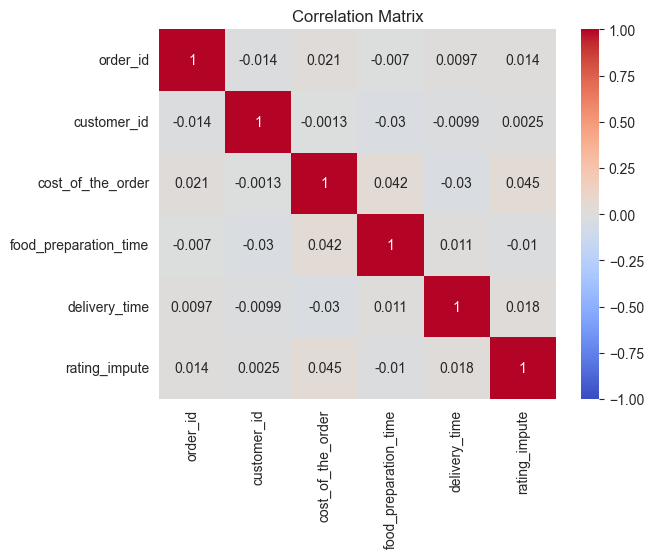

In [45]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

##### Observations
* No significance correlation between numerical attributes
* Slightly inverse correlation between delivery_time and cost_of_the_order which is obvious.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
# Write the code here
# restaurant with average rating > 4 and total rating >50
# Filtering 'Not given' rating and convert it to float.
df_conv = df.copy()
#df_conv["rating_conv"] = df_conv["rating"].apply(lambda x: None if x == "Not given" else float(x))
df_conv["rating_conv"] = df_conv[df_conv["rating"] != "Not given"]["rating"].astype("float")

# Grouping dataframe by restaurant name and calculate total and average rating
df_rating = df_conv.groupby("restaurant_name").agg(total_rating=('rating_conv', 'count'), avg_rating=('rating_conv', 'mean'))

# Filtering with total rating > 50 and avg rating > 4
df_rating = df_rating[(df_rating["total_rating"] > 50) & (df_rating["avg_rating"] > 4)]

print(df_rating)

                           total_rating  avg_rating
restaurant_name                                    
Blue Ribbon Fried Chicken            64    4.328125
Blue Ribbon Sushi                    73    4.219178
Shake Shack                         133    4.278195
The Meatball Shop                    84    4.511905


#### Observations:

The following restaurant has average rating > 4 and total rating > 50:

Blue Ribbon Fried Chicken            
Blue Ribbon Sushi                    
Shake Shack                         
The Meatball Shop                    


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
# Write the code here
#Finding the net revenue
total_revenue = df['cost_of_the_order'].apply(lambda x: x * .25 if x > 20 else ( x * .15 if x > 5 else 0)).sum()
print("Total revenue = ${}".format(total_revenue))

Total revenue = $6166.303


#### Observations:
Total revenue is $6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
# Write the code here
# Creating a new column with adding both delivery time and food preparation time
df_total = df.copy()
df_total['total_time'] = df_total['delivery_time'] + df_total['food_preparation_time']

# Filtering records with total time > 60 and get the total order count 
total_order_taking_more_than_60min = df_total[df_total['total_time'] > 60]['order_id'].count()
# Total order = total record count as data is not null
total_order = df_total.shape[0]

print("total order taking more than 60 min = {}".format(total_order_taking_more_than_60min))
print("total order = {}".format(total_order))
print("percentage of order taking more than 60 min = {:.2%}".format(total_order_taking_more_than_60min/total_order))


total order taking more than 60 min = 200
total order = 1898
percentage of order taking more than 60 min = 10.54%


#### Observations:

10.54% of orders taking more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
# Write the code here
# Average delivery time by day_of_the_week
df_delivery=df.groupby("day_of_the_week")["delivery_time"].mean().reset_index().rename(columns={"delivery_time":"Avg delivery time (min)"})
print(df_delivery.to_string(index=False))

day_of_the_week  Avg delivery time (min)
        Weekday                28.340037
        Weekend                22.470022


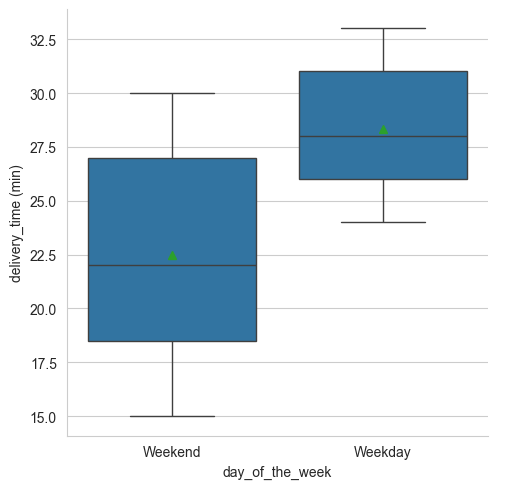

In [50]:
# Plotting delivery_time box plot over weekday and weekend
sns.catplot(data=df, x="day_of_the_week", y="delivery_time",  kind="box", showmeans=True)
plt.ylabel('delivery_time (min)')
plt.show()

#### Observations:
* Weekday has longer delivery time than Weekend
* Weekday has longer average/mean delivery time than Weekend. Weekday order took 28.340037 minutes where weekend took 22.470022 minutes on average to delivery.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Majority of customers (65%) who ordered food used the app for only once.
*  Top 20 restaurants get the almost 63% of orders and 50 restaurants with only one order.
*  People ordered more in weekend (71.2%) than weekday (28.8%)
*  American, Japanese, Italian, and Chinese are the top popular cuisine and almost 82.56% of orders were from the above top 4 cuisines.
*  736 orders (38.8% of orders) have missing/Unknown rating and 588 orders are rated 5 (31% of total order)
*  Orders have longer delivery time in Weekdays than Weekends. This is possible due to high traffic in Weekdays or shortage of delivery persons in
   Weekend.
*  10.54% of order took more than 60 minutes to deliver.
*  The cost of majority of orders fall in between \\$12 - \\$23 

### Recommendations:

Increasing Revenue
* Discount/promotion can be given in Weekdays to top rated (e.g., average rating > 4 and total rating > 50) restaurants to increase the sales and revenue.
* Collaborating with restaurants who have fewer orders and low rating and encourage them to improve their service with serving food of popular cuisine (American, Japanese, Italian, and Chinese, etc.).
* People order more in Weekend and spend a little bit more on an average than Weekday. So, promotional offer should be given on popular food.
  and popular restaurant so that people order more foods which will substantially increase sale and company will generate more money.
* Data driven revenue sharing model can be implemented with restaurants. For example: The below sharing model generates \\$6768.56

   0%  for orders costing < \\$5, 20%  for orders costing >= \\$5 and < \\$10, 25%  for orders costing >= \\$10 and < \\$25, 15%  for orders costing >= \\$25  

Increasing efficiency
*  There is an oppertunity to decrease the total delivery time as 10.54% of orders took more than 60 minutes. Encourage delivery personals with more incentive to reduce the delivery cost.
*  As Weekends have higher total number of orders with longer delivery time, more delivery personals can be assigned during the weekend. Moreover, orders can be routed to delivery personals with closest to restaurants and customers as much as possible to avoid longer route and traffic.

Encouraging to provide feedback
* The dataset has a lot of missing (Not given) rating. Therefore, we can introduce point/incentive to customers who provide feedback/rating.



#### Appendix

In [51]:
# Total revenue generated by the example sharing model in the recommendation
total_revenue = df['cost_of_the_order'].apply(lambda x: x * .15 if x > 25 else (0 if x < 5 else (x * .25 if (x >= 10 and x <25) else x * .2)) ).sum()
print("Total revenue = ${}".format(total_revenue))

Total revenue = $6768.5689999999995


---